In [1]:
import pandas as pd
import seaborn as sns
import nltk
import numpy as np
import wordcloud

In [5]:
# !wget -O data/yelp_rev.json https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/classification-of-yelp-restaurant-reviews-using-sentiment-analysis/asset/sample_data.json

--2022-04-29 17:40:45--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/classification-of-yelp-restaurant-reviews-using-sentiment-analysis/asset/sample_data.json
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70142708 (67M) [application/json]
Saving to: ‘data/yelp_rev.json’

data/yelp_rev.json  100%[===================>]  66.89M  1.24MB/s    in 53s     

2022-04-29 17:41:41 (1.25 MB/s) - ‘data/yelp_rev.json’ saved [70142708/70142708]



In [7]:
rev = pd.read_json('data/yelp_rev.json')
print(rev.info())
rev.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86354 entries, 0 to 86353
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   index        86354 non-null  int64         
 1   review_id    86354 non-null  object        
 2   user_id      86354 non-null  object        
 3   business_id  86354 non-null  object        
 4   stars        86354 non-null  int64         
 5   useful       86354 non-null  int64         
 6   funny        86354 non-null  int64         
 7   cool         86354 non-null  int64         
 8   text         86354 non-null  object        
 9   date         86354 non-null  datetime64[ns]
 10  year         86354 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(4)
memory usage: 7.9+ MB
None


,index,review_id,user_id,business_id,stars,useful,funny,cool,text,date,year
0,4686059,aFz1itIWIl7Qojxhpa0VoQ,SsUKdScC6NKcnFFio75wMA,H1ifIm6P1TgCjxM-TOlgTw,1,1,1,0,Ok so now i go to see a movie and homeboy hand...,2016-11-19 20:40:09,2016
1,6762380,s_ba4NB2G2QWS3izLkvl5Q,q5zFh3bhuLy6u7CzYlsa8Q,3r3RHfuLPgRSiRkp5udXSw,5,0,0,0,"It wasn't my choice to eat breakfast here, but...",2019-09-02 17:40:35,2019
2,491263,K1I5yuJICQpInOy-wCCo9A,UqqqBhqlAHiHfB_V3BNmvw,ljGzs5MhfnH1pKfJjFFRlQ,5,0,0,0,The staff is very friendly and I really like D...,2017-06-25 01:27:59,2017
3,6662859,NOwHErM1-u4d8Z6vSS7FwA,cmHaLdW8ssAXK2MKZ2idmw,xoJSkBTusOEt8PPvuw2qEQ,1,0,2,0,I usually have a great experience here but lef...,2017-02-05 20:22:26,2017
4,7361472,JjvOoHUs-OrPEnuUUanDsw,dTSwfFTTHPHwSe48qDkPXg,wTBid_bYRigHAl6vNHYeOQ,5,4,1,1,UPDATE:\nI have been contacted shortly after t...,2016-03-03 17:59:40,2016


In [27]:
rev['text'][10810]

'I love Stumptown Coffee! This location has a cool vibe and lots of seating. This was one of our favorite coffee spots on our trip to Portland.'

In [12]:
reviews=rev[['text','stars']]

Text(0, 0.5, 'count')

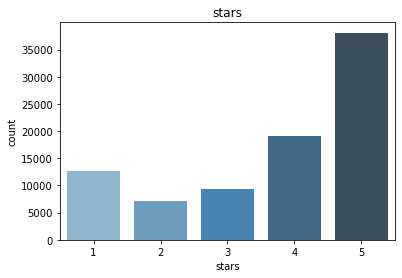

In [16]:
cplot = sns.countplot(x='stars', data=reviews, palette="Blues_d")
cplot.set_title('stars')
cplot.set_ylabel('count')

## TEXT CLEANING

In [28]:
from nltk.corpus import stopwords
import string
cachedStopWords = stopwords.words("english")
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [29]:
def remove_punc_stopword(text):

    remove_punc = [ch for ch in text.lower() if ch not in string.punctuation]
    remove_punc = ''.join(remove_punc)
    return [word for word in remove_punc.split() if word not in cachedStopWords]

In [30]:
cleaned_reviews = reviews.copy()
cleaned_reviews['text'] = reviews['text'].apply(remove_punc_stopword)

In [34]:
reviews['text'][0]

'Ok so now i go to see a movie and homeboy hands me a sheet.  where do you want to sit? \nim like "whatever bro ill find my seat when I walk in."\n"oh its all reserved seating "\n\nthats the most idiotic thing ive ever heard.   lazy millenials cant even bother to search for a seat.  gotta reserve them like a bunch of petulant little sissys.'

In [35]:
print(cleaned_reviews['text'][0])

['ok', 'go', 'see', 'movie', 'homeboy', 'hands', 'sheet', 'want', 'sit', 'im', 'like', 'whatever', 'bro', 'ill', 'find', 'seat', 'walk', 'oh', 'reserved', 'seating', 'thats', 'idiotic', 'thing', 'ive', 'ever', 'heard', 'lazy', 'millenials', 'cant', 'even', 'bother', 'search', 'seat', 'gotta', 'reserve', 'like', 'bunch', 'petulant', 'little', 'sissys']


In [38]:
string.punctuation.split()

['!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~']

In [51]:
# nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mehdielhaylali/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [52]:
# using nltk
from nltk.tokenize import word_tokenize
def nltk_tokenizer(text):
    tokens = word_tokenize(text.lower())
    return [token for token in tokens if token not in cachedStopWords and token not in string.punctuation]

nltk_cleaned_reviews = reviews.copy()
nltk_cleaned_reviews['text'] = reviews['text'].apply(nltk_tokenizer)

In [53]:
print(nltk_cleaned_reviews['text'][0])

['ok', 'go', 'see', 'movie', 'homeboy', 'hands', 'sheet', 'want', 'sit', 'im', 'like', '``', 'whatever', 'bro', 'ill', 'find', 'seat', 'walk', "''", '``', 'oh', 'reserved', 'seating', '``', 'thats', 'idiotic', 'thing', 'ive', 'ever', 'heard', 'lazy', 'millenials', 'cant', 'even', 'bother', 'search', 'seat', 'got', 'ta', 'reserve', 'like', 'bunch', 'petulant', 'little', 'sissys']
